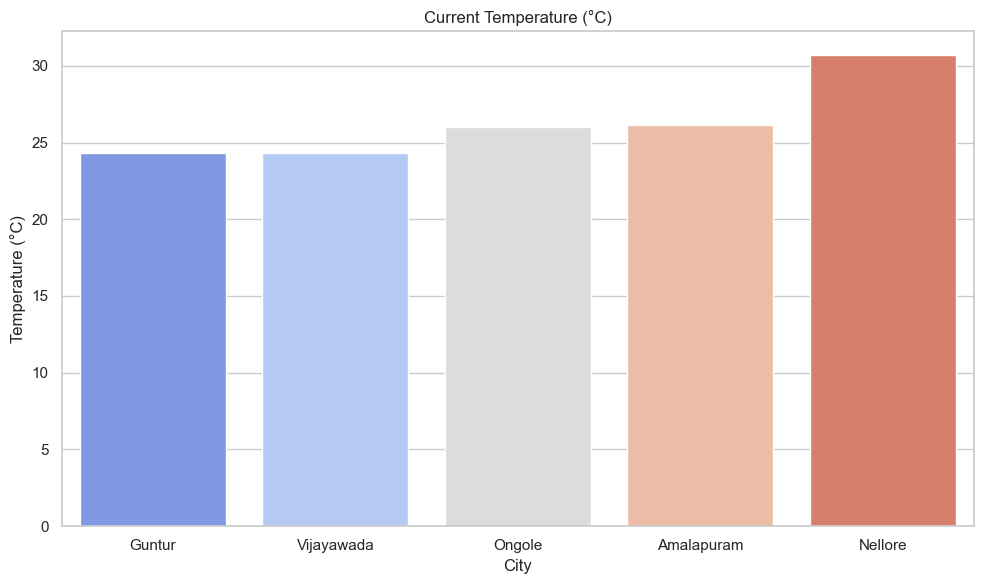

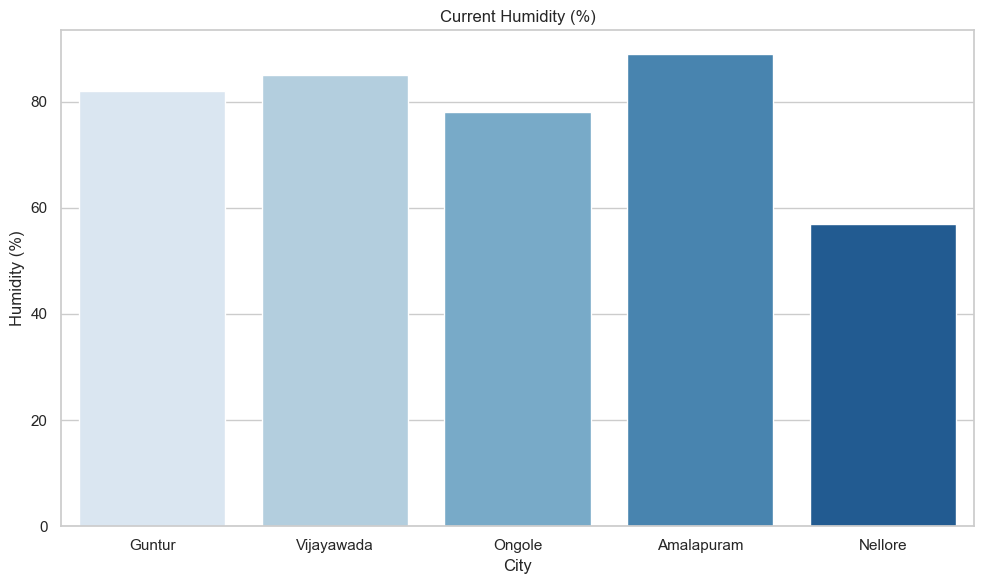

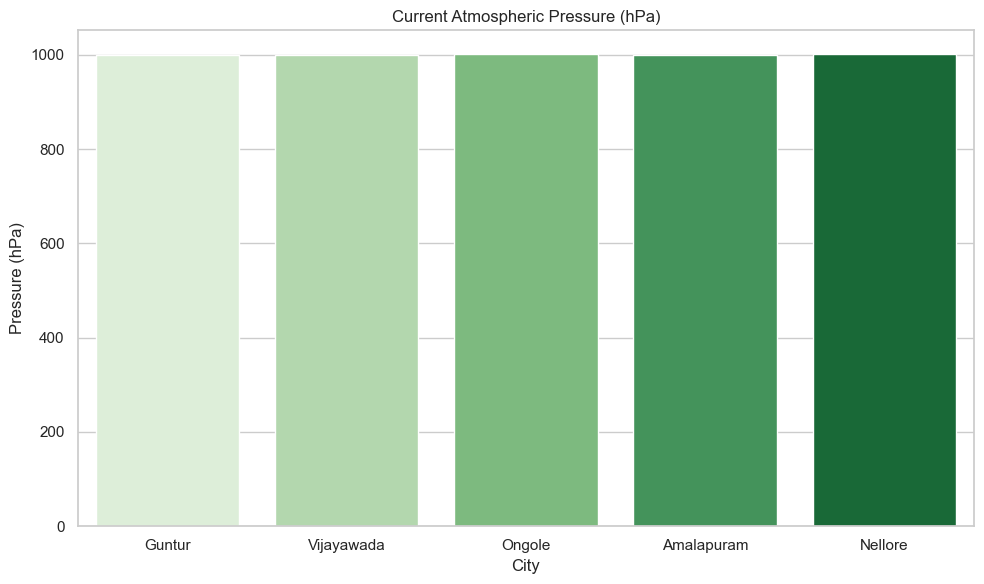

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your OpenWeatherMap API key
API_KEY = "ce717977d201ec23daa8944391eece28"
BASE_URL = "https://api.openweathermap.org/data/2.5/weather"

# Cities to query
cities = ["Guntur", "Vijayawada", "Ongole", "Amalapuram", "Nellore"]

# Fetch weather data
weather_data = []

for city in cities:
    params = {
        'q': city,
        'appid': API_KEY,
        'units': 'metric'
    }
    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        data = response.json()
        weather_data.append({
            'city': city,
            'temperature': data['main']['temp'],
            'humidity': data['main']['humidity'],
            'pressure': data['main']['pressure']
        })
    else:
        print(f"Failed to retrieve data for {city}. Status code: {response.status_code}")
        print(response.text)

# Convert to DataFrame
df = pd.DataFrame(weather_data)

# Set Seaborn style
sns.set(style="whitegrid")

# Plotting function with fixed palette usage
def plot_metric(df, metric, title, ylabel, palette):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='city', y=metric, hue='city', palette=palette, dodge=False, legend=False)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("City")
    plt.tight_layout()
    plt.show()

# Plot temperature
plot_metric(df, 'temperature', "Current Temperature (°C)", "Temperature (°C)", "coolwarm")

# Plot humidity
plot_metric(df, 'humidity', "Current Humidity (%)", "Humidity (%)", "Blues")

# Plot pressure
plot_metric(df, 'pressure', "Current Atmospheric Pressure (hPa)", "Pressure (hPa)", "Greens")
